### This script contains the following points:
#### Section 1. Importing Libraries, Defining Project Path, Importing Dataset "summiters.csv" 

#### Section 2. Exporting 'df_sums' to view in Excel

#### Section 3. Importing 'df_sums_cleaner' to finish cleaning step checks

#### Section 4. Cleaning Data


## Section 1. Importing Libraries, Defining Project Path, Importing Dataset "summiters.csv"

In [1]:
# Importing pandas, numpy, and os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os

In [2]:
# Defining project folder path
path = r'C:\Users\prena\05-2023 Himalayan Expeditions Analysis'

In [3]:
path

'C:\\Users\\prena\\05-2023 Himalayan Expeditions Analysis'

In [4]:
# Importing summiters.csv dataset (PRIMARY)
df_sums = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'summiters.csv'), index_col = False)

In [5]:
df_sums.head()

,peak_id,peak_name,name,yr_season,date,time,citizenship,gender,age,is_o2_used,died_on_descent,host_country
0,ACHN,Aichyn,Kaya Ko,2015 Aut,Sep 03,13:15,Japan,F,23,No,.,Nepal
1,ACHN,Aichyn,Yuma Ono,2015 Aut,Sep 03,13:15,Japan,M,19,No,.,Nepal
2,ACHN,Aichyn,Shintaro Saito,2015 Aut,Sep 03,13:15,Japan,M,25,No,.,Nepal
3,ACHN,Aichyn,Hiroki (Yuki) Senda,2015 Aut,Sep 03,13:15,Japan,M,23,No,.,Nepal
4,ACHN,Aichyn,Yuto Tamaki,2015 Aut,Sep 03,13:15,Japan,M,22,No,.,Nepal


In [6]:
df_sums_subset = df_sums[['yr_season','date']]

In [7]:
df_sums_subset

,yr_season,date
0,2015 Aut,Sep 03
1,2015 Aut,Sep 03
2,2015 Aut,Sep 03
3,2015 Aut,Sep 03
4,2015 Aut,Sep 03
...,...,...
30674,2017 Aut,Oct 29
30675,2017 Aut,Oct 29
30676,1989 Aut,Dec 31
30677,1989 Aut,Dec 31


In [18]:
# Checking for missing values
df_sums_subset.isnull().sum()

yr_season    0
date         0
dtype: int64

<b>Looking at our 'yr_season' and 'date' columns, it looks as though the year is contained in 'yr_season' while the Month and Day are held in the 'date' column.</b>

Ultimately, I want a date column in the format of 'mm/dd/yyyy' in it's own column and then a count of how many summits occured for each 'mm/dd/yyyy' from Jan 1990 to Dec 2019 on a quarterly basis. (Each record in summiters.csv is representative of 1 climber that has summitted, therefore I would need to do a =countifs() in Excel (or a value_counts() in Python) to get a count of how many summiters there were for each quarter.

<b>I'm exporting this in Excel to save some time, and will import for the remainder of the checks.</b>

## Section 2. Exporting 'df_sums_subset' to view in Excel

In [8]:
# Exporting df_sums_subset to do some right(),left(),concatenate, and sumifs action!
df_sums_subset.to_csv(os.path.join(path,'02 Data','Original Data','summits_dates_to_be_fixed.csv')) 

<b>To get to the following table, I took the following steps:</b>

1. In the data table, created the following columns out of the 'date' column:
    - =Month() -- This is to get the month of the date
    - =Day() -- This is to get the day of the month
2. In the data table, created the following column out of the 'yr_season' column:
    - =left() -- This is to get the year of the summit
3. Created a new column to concatenate the day, month, and year in the following date format: mm/dd/yyyy
4. Created a new sheet in summiters.csv called summiters_monthly.csv
5. Created a "Date" column in column A
6. Listed each month from 01/01/1990 to 12/01/2019.
7. Creatd a new column "summits", and used countifs() to count the number of records for each month
8. Created a new column "summits quarterly", and summed the summits column in a three month interval
9. Saved the "date" column and "summits quarterly" column in a new workbook.
10. Removed all "date" rows that didn't match our 3 month quarter interval (to allow us to have a 3 month interval with the sum of all summits for those three months).

## Section 3. Importing 'df_sums_cleaner' to finish cleaning step checks

In [9]:
# Importing df_sums_consolidated to finish cleaning steps
df_sums_cleaner = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'summits_30yrs_quarterly.csv'), index_col = False)

In [10]:
df_sums_cleaner

,date,summits
0,03/01/1990,0
1,06/01/1990,95
2,09/01/1990,28
3,12/01/1990,190
4,03/01/1991,0
...,...,...
117,06/01/2019,1202
118,09/01/2019,414
119,12/01/2019,539
120,03/01/2020,0


## Section 4. Cleaning Data

In [11]:
# Checking for missing values
df_sums_cleaner.isnull().sum()

date       0
summits    0
dtype: int64

In [12]:
# Checking for duplicates
dups = df_sums_cleaner.duplicated()

In [13]:
dups.shape

(122,)

C:\Users\prena\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='summits', ylabel='Density'>

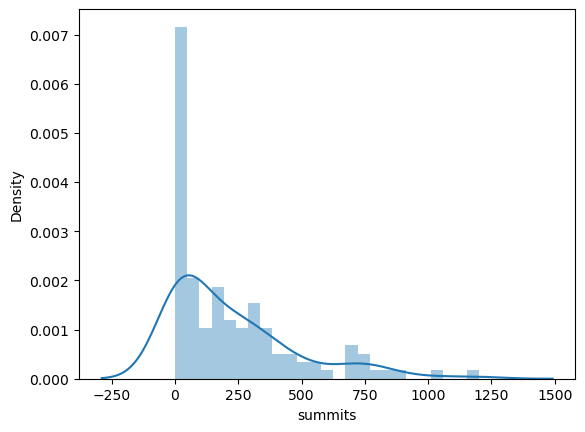

In [14]:
# Checking for extreme values for variables 'mbrs_summited'
sns.distplot(df_sums_cleaner['summits'], bins=25)

In [15]:
# Checking mean of mbrs_summited
df_sums_cleaner['summits'].mean()

221.9262295081967

In [16]:
# Checking median of mbrs_summited
df_sums_cleaner['summits'].median()

152.5

In [17]:
# Checking max of mbrs_summited
df_sums_cleaner['summits'].max()

1202

<b>Our data is now cleaned, and I will be turning the "date" column into the index in script "7. Time Series Analysis - Summits by Quarter (1990 - 2019)".</b>